<a href="https://colab.research.google.com/github/rizal-fd/image-processing/blob/main/image-enhancement-basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
# Rizal Fadlullah
# A11.2019.12070

#IMAGE ENHANCEMENT
diketahui matriks suatu citra sebagai berikut:
\begin{bmatrix}
x1 & x2 & x3 & x4 & x5\\
49 & 57 & 46 & 81 & 82\\
72 & 35 & 64 & 83 & 83\\
41&72&71&31&32\\
21&87&86&42&31
\end{bmatrix}
dengan $x1, x2, x3, x4, x5$ merupakan digit terakhir NIM anda




####Nomor 1
Hitung sebaran histogram untuk intensitas tiap pixel!

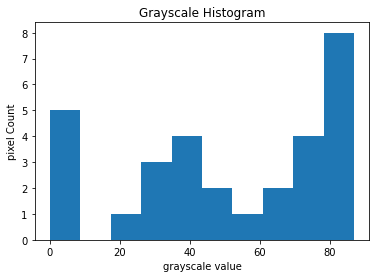

In [102]:
img = np.array(([1,2,0,7,0],[49,57,46,81,82],[72,35,64,83,83],[72,35,64,83,83],[41,72,71,31,32],[21,87,86,42,31]))
def compare(out):
  plt.subplot(1,2,1)
  plt.imshow(img,cmap="gray")
  plt.title("Original Image")
  plt.axis('off')

  plt.subplot(1,2,2)
  plt.imshow(out,cmap="gray")
  plt.title("Output Image")
  plt.axis('off')
  plt.show()

#Histogram
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel Count")
plt.hist(img.flatten())
plt.show()

####Nomor 2
Hitung matriks inversi dengan $Fmaks = 127$!

    $f(x,y)'=255-f(x,y)$

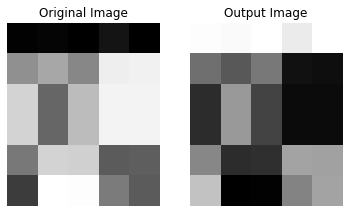

[[126 125 127 120 127]
 [ 78  70  81  46  45]
 [ 55  92  63  44  44]
 [ 55  92  63  44  44]
 [ 86  55  56  96  95]
 [106  40  41  85  96]]


In [103]:
out = 127-img
compare(out)
print(out)

####Nomor 3
Hitung matriks hasil peningkatan kontras dengan nilai konstanta 33 !

  $f(x,y)'=f(x,y)\times k$

In [104]:
out = img*33
print(out)

[[  33   66    0  231    0]
 [1617 1881 1518 2673 2706]
 [2376 1155 2112 2739 2739]
 [2376 1155 2112 2739 2739]
 [1353 2376 2343 1023 1056]
 [ 693 2871 2838 1386 1023]]


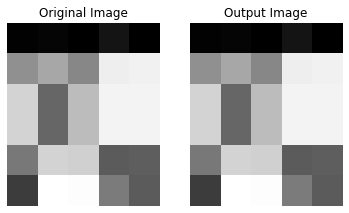

In [105]:
compare(out)

####Nomor 4
Hitung matriks hasil peningkatan kecerahan dengan nilai kostasnta 33 !

  $f(x,y)'=f(x,y)\pm k$

In [106]:
out=img+33
print(out)

[[ 34  35  33  40  33]
 [ 82  90  79 114 115]
 [105  68  97 116 116]
 [105  68  97 116 116]
 [ 74 105 104  64  65]
 [ 54 120 119  75  64]]


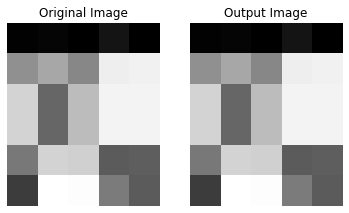

In [107]:
compare(out)

####Nomor 5
Hitung matriks hasil perbaikan dengan metode korelasi yang memiliki kernel 3x3 !

  $h(x,y)=f(x,y)*g(x,y)=\sum_{k=1}^{M}\sum_{l=1}^{N}f(k,l)\times g(x-k,y-l) $

  Jika jumlah nilai di dalam kernel > 1, maka $h(x,y)$ dibagi dengan jumlah tersebut. Jika jumlahnya nol, maka $h(x,y)$ dibagi dengan 1

In [108]:
kernel=np.array([[0,1,0],
                 [-1,1,-1],
                 [0,1,0]])
out = cv.filter2D(img.astype(np.uint8),-1,kernel)
print(out)

[[ 95 115  83 169 150]
 [  8   0   0  43   3]
 [123   0  56 100  82]
 [115   6  81  50  32]
 [  0  82 118  53  84]
 [  0 124  99   0  11]]


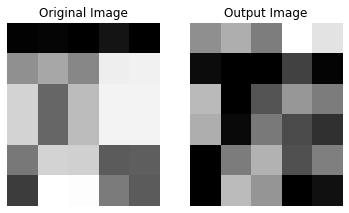

In [109]:
compare(out)

####Nomor 6

Hitung matriks hasil perbaikan dengan Gaussian Filter dengan memilih $\sigma^2=2$, dan nilai pada titik $(0,0)=1$ !

  $g(x,y)=\frac{1}{2\pi \sigma^2}e^{-\frac{x^2 +y^2}{2\sigma^2}}$


In [110]:
def gaussian (sz,sigma):
  gaussian = np.zeros((sz,sz))
  m=sz//2
  for x in range(-m,m+1):
    for y in range(-m,m+1):
      x1=2*np.pi*sigma**2
      x2=np.exp(-(y**2+x**2)/(2*sigma**2))
      gaussian[x+m,y+m]=1/x1*x2
  return gaussian
kernel=gaussian(3,np.sqrt(2))
print(kernel)

[[0.04826618 0.061975   0.04826618]
 [0.061975   0.07957747 0.061975  ]
 [0.04826618 0.061975   0.04826618]]


In [111]:
kernel[1,1]=1
print(kernel)

[[0.04826618 0.061975   0.04826618]
 [0.061975   1.         0.061975  ]
 [0.04826618 0.061975   0.04826618]]


In [112]:
out = cv.filter2D(img.astype(np.uint8),-1,kernel)
print(out)

[[ 18  18  20  29  27]
 [ 64  72  65 102 106]
 [ 93  60  90 116 119]
 [ 94  62  90 111 111]
 [ 67  98  99  58  55]
 [ 51 113 113  63  46]]


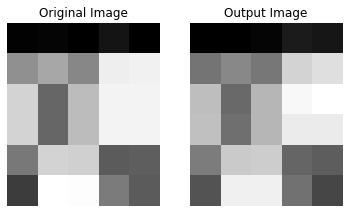

In [113]:
compare(out)